# Diwali sales Analysis

### Importing Libraries (ToolKite)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

### Importing & Inspecting Data

In [5]:
df=pd.read_csv(r"D:\Data Analyst Projects\100 Projects\5- Diwali Sales Analysis\5- Diwali Sales Analysis.csv", encoding = 'unicode_escape')

df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
df.drop(['Status','unnamed1'], axis=1 , inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df['Amount'] = df['Amount'].astype(int)

In [12]:
df.rename(columns = {'Marital_Status': 'Married'} , inplace = True)

In [13]:
for col in df.describe(include = object).columns:
    print(col)
    print(df[col].unique())
    print('_' * 60)

Cust_name
['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
____________________________________________________________
Product_ID
['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
____________________________________________________________
Gender
['F' 'M']
____________________________________________________________
Age Group
['26-35' '0-17' '18-25' '51-55' '46-50' '55+' '36-45']
____________________________________________________________
State
['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Jharkhand' 'Kerala' 'Haryana'
 'Madhya Pradesh' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']
____________________________________________________________
Zone
['Western' 'Southern' 'Central' 'Northern' 'Eastern']
____________________________________________________________
Occupation
['Healthcare' 'Govt' 'Automobile' 'Construction' 'Food Processing'
 'Lawyer' 'Media' 'Banking' 'Retail' 

### Exploratory Data Analysis (EDA)

In [15]:
df[['Age' , 'Orders' , 'Amount']].describe().round(2)

,Age,Orders,Amount
count,11239.00,11239.00,11239.00
mean,35.41,2.49,9453.61
std,12.75,1.11,5222.36
min,12.00,1.00,188.00
25%,27.00,2.00,5443.00
50%,33.00,2.00,8109.00
75%,43.00,3.00,12675.00
max,92.00,4.00,23952.00


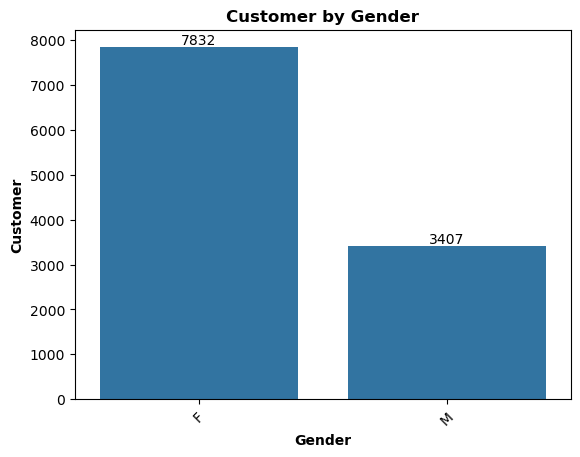

In [16]:
customer_by_gender = sns.countplot( x = 'Gender' , data=df)

for bars in customer_by_gender.containers:
    customer_by_gender.bar_label(bars)

plt.title('Customer by Gender', fontweight='bold')
plt.xlabel('Gender' , fontweight='bold')
plt.ylabel('Customer' , fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout

plt.show()

In [17]:
sales_by_gender= df.groupby(['Gender'] , as_index = False)['Amount'].sum()
sales_by_gender

,Gender,Amount
0,F,74335853
1,M,31913276


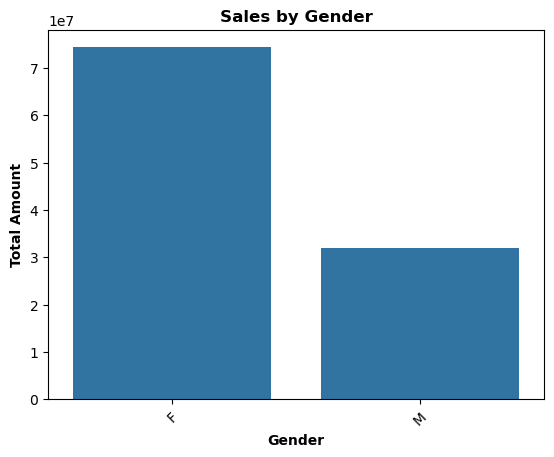

In [18]:
sns.barplot(x = 'Gender' , y = 'Amount' , data = sales_by_gender)

plt.title('Sales by Gender', fontweight='bold')
plt.xlabel('Gender' , fontweight='bold')
plt.ylabel('Total Amount' , fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout

plt.show()

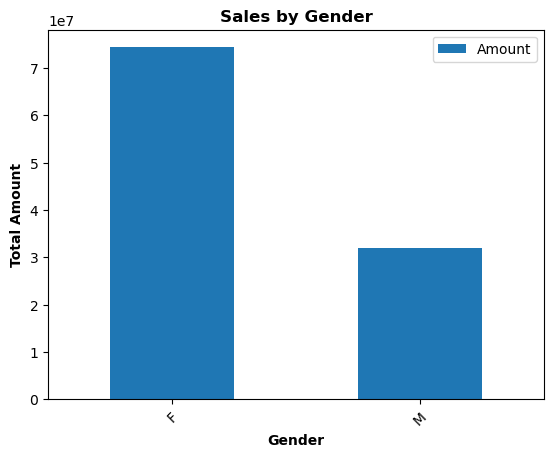

In [19]:
sales_by_gender.plot(kind="bar", x= 'Gender', y = 'Amount'  )

plt.title('Sales by Gender', fontweight='bold')
plt.xlabel('Gender' , fontweight='bold')
plt.ylabel('Total Amount' , fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout

plt.show()

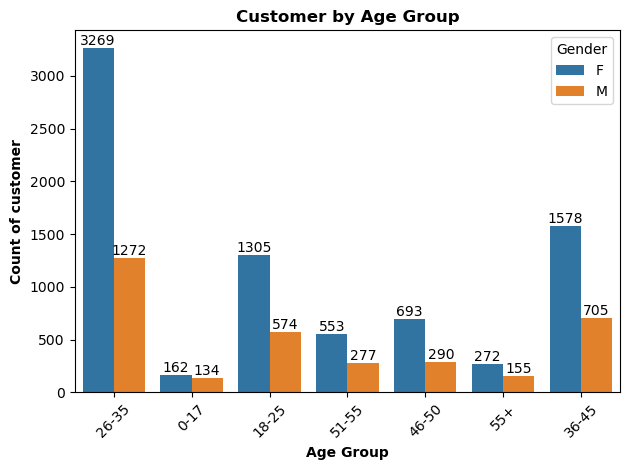

In [20]:
Customer_by_age_group=sns.countplot( data=df , x='Age Group' ,  hue = 'Gender' )

for bars in Customer_by_age_group.containers:
    Customer_by_age_group.bar_label(bars)

plt.title('Customer by Age Group' , fontweight='bold')
plt.xlabel('Age Group' ,fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Count of customer' , fontweight='bold')
plt.tight_layout()
plt.show()

In [21]:
sales_by_age_group = df.groupby(['Age Group'] , as_index= False )['Amount'].sum().sort_values(by='Amount' , ascending=False )

sales_by_age_group

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


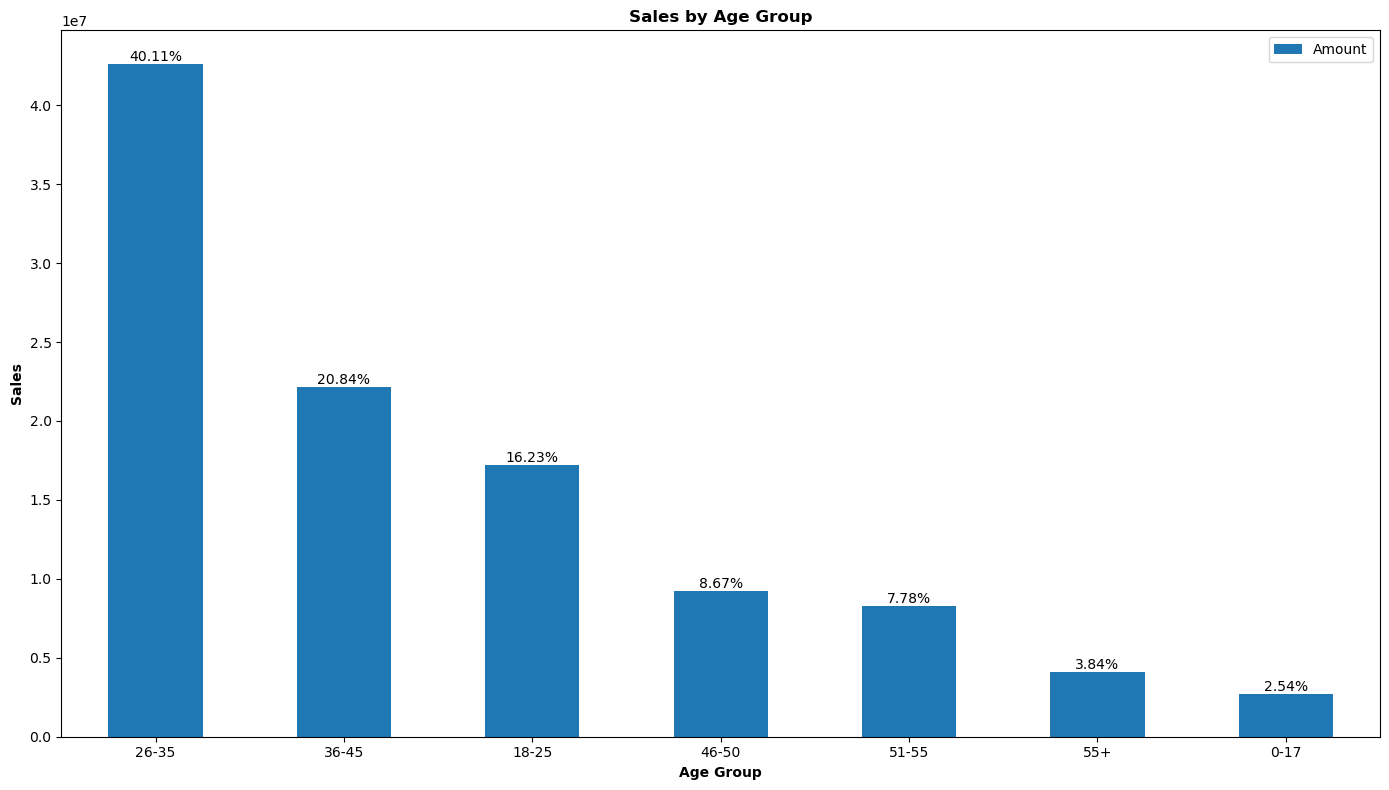

In [22]:
sales_by_age_group.plot( kind='bar' , figsize=(14,8) , x= 'Age Group' , y = 'Amount')

total=sum(sales_by_age_group['Amount'])
for i, v in enumerate(sales_by_age_group["Amount"]):
    percentage = v/total *100
    plt.text(i, v, f'{percentage:.2f}%', ha="center", va="bottom")

plt.title('Sales by Age Group' , fontweight='bold')
plt.xlabel('Age Group' ,  fontweight='bold')
plt.xticks(rotation=360)
plt.ylabel('Sales'  , fontweight='bold')
plt.tight_layout()

plt.show()

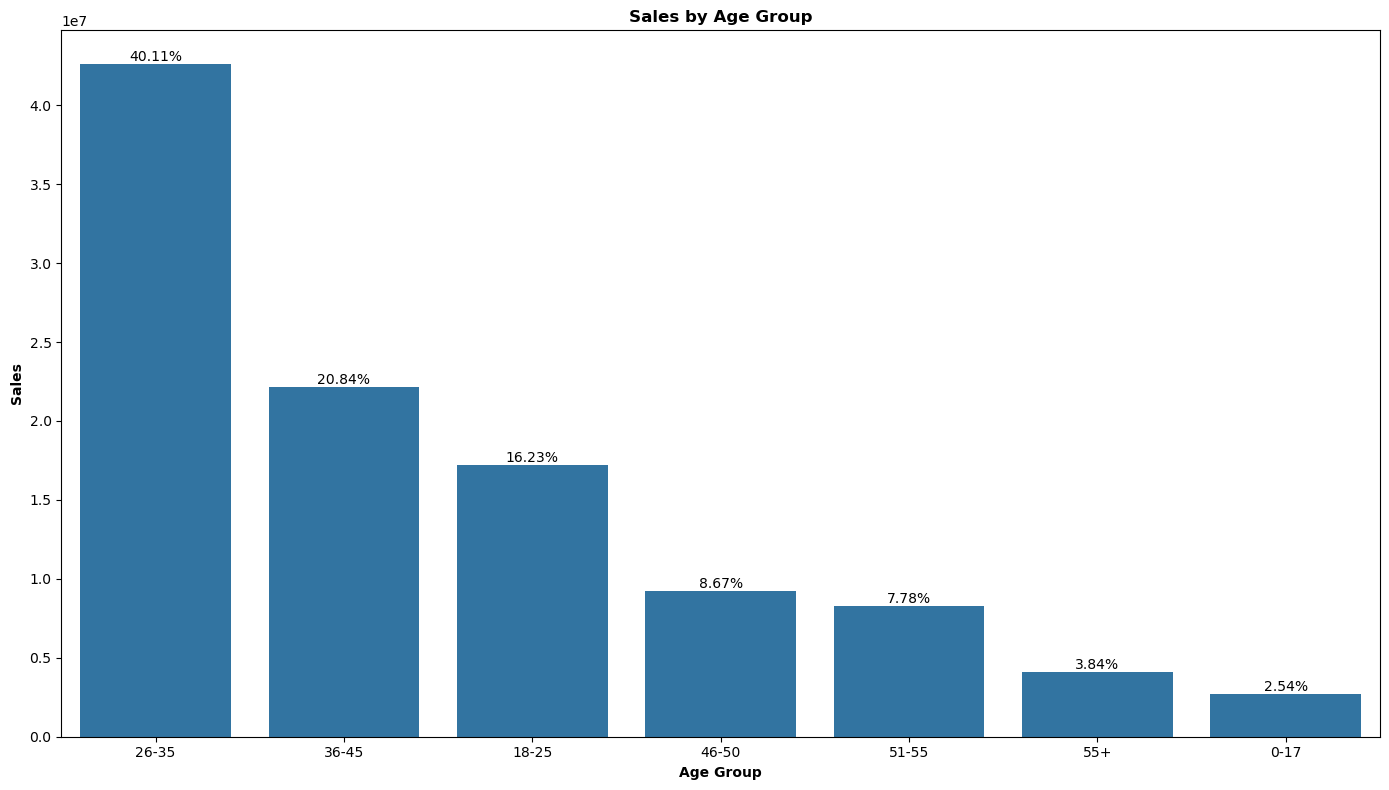

In [23]:
plt.figure(figsize=(14,8))
sns.barplot( data=sales_by_age_group , x= 'Age Group' , y = 'Amount' )

total=sum(sales_by_age_group['Amount'])
for i, v in enumerate(sales_by_age_group["Amount"]):
    percentage = v/total *100
    plt.text(i, v, f'{percentage:.2f}%', ha="center", va="bottom")

plt.title('Sales by Age Group' , fontweight='bold')
plt.xlabel('Age Group' ,  fontweight='bold')
plt.ylabel('Sales'  , fontweight='bold')
plt.tight_layout()

plt.show()

In [24]:
sales_by_state = df.groupby(['State'] , as_index= False )['Amount'].sum().sort_values(by='Amount' , ascending=False )

sales_by_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


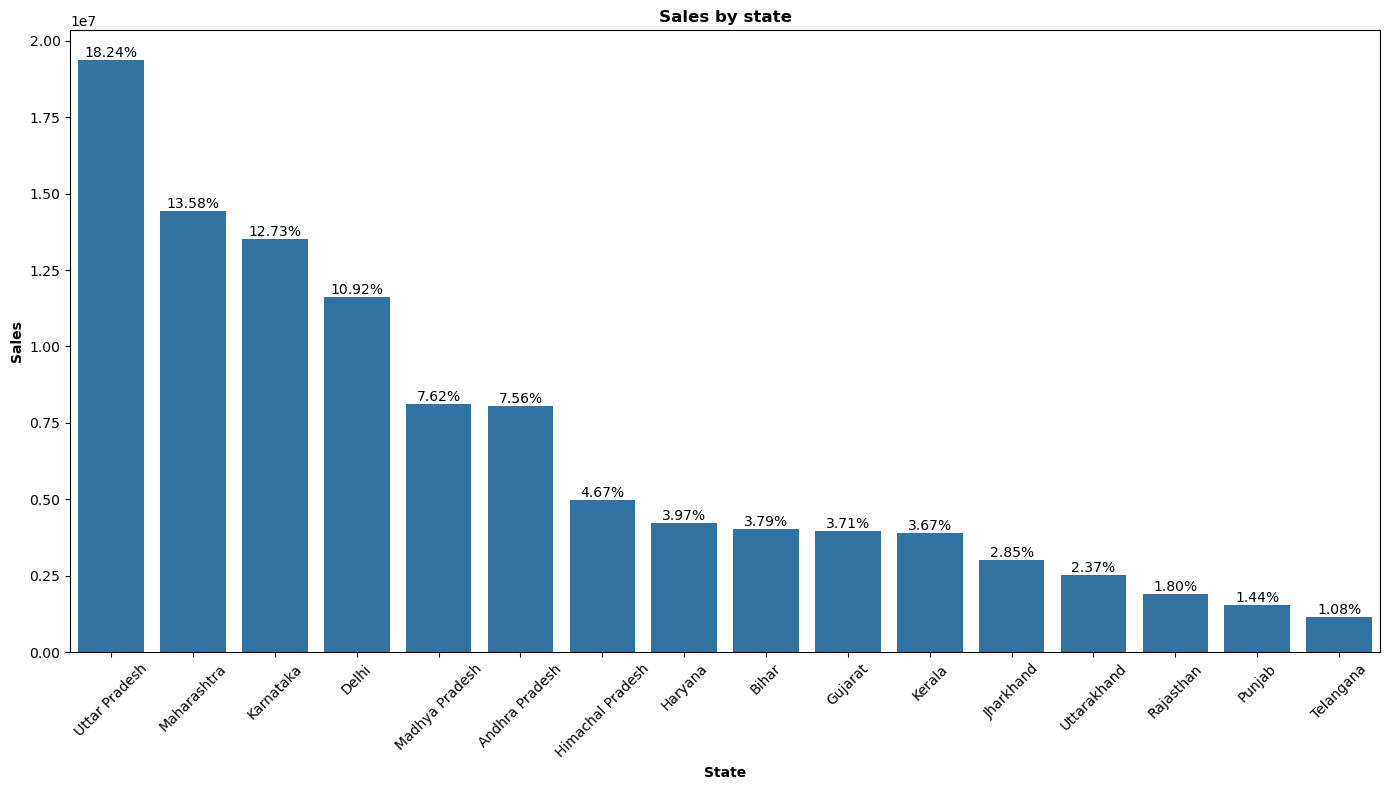

In [25]:
plt.figure(figsize=(14,8))
sns.barplot( data=sales_by_state , x= 'State' , y = 'Amount' )

total=sum(sales_by_state['Amount'])
for i, v in enumerate(sales_by_state["Amount"]):
    percentage = v/total *100
    plt.text(i, v, f'{percentage:.2f}%', ha="center", va="bottom")

plt.title('Sales by state' , fontweight='bold')
plt.xlabel('State' ,  fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Sales'  , fontweight='bold')
plt.tight_layout()

plt.show()

In [26]:
sales_by_marital_status = df.groupby(['Married', 'Gender'], as_index=False)['Amount'].sum()
sales_by_marital_status

,Married,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


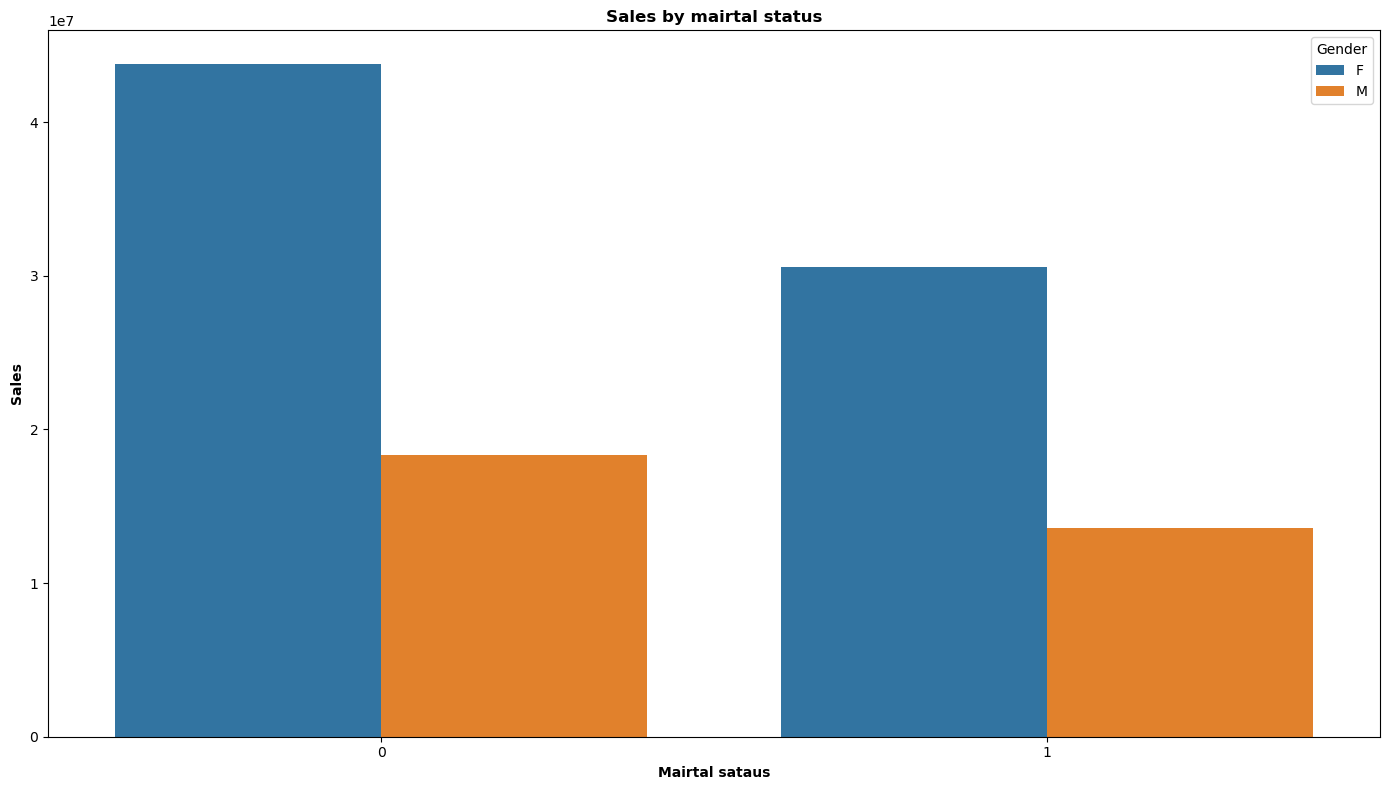

In [27]:
plt.figure(figsize=(14,8))
sns.barplot( data = sales_by_marital_status , x= 'Married' , y = 'Amount' , hue = 'Gender' )

plt.title('Sales by mairtal status' , fontweight='bold')
plt.xlabel('Mairtal sataus' , fontweight='bold')
plt.ylabel('Sales' , fontweight='bold')
plt.tight_layout()

plt.show()

In [28]:
sales_by_occupation = df.groupby(['Occupation'] , as_index= False )['Amount'].sum().sort_values(by='Amount' , ascending=False )

sales_by_occupation

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


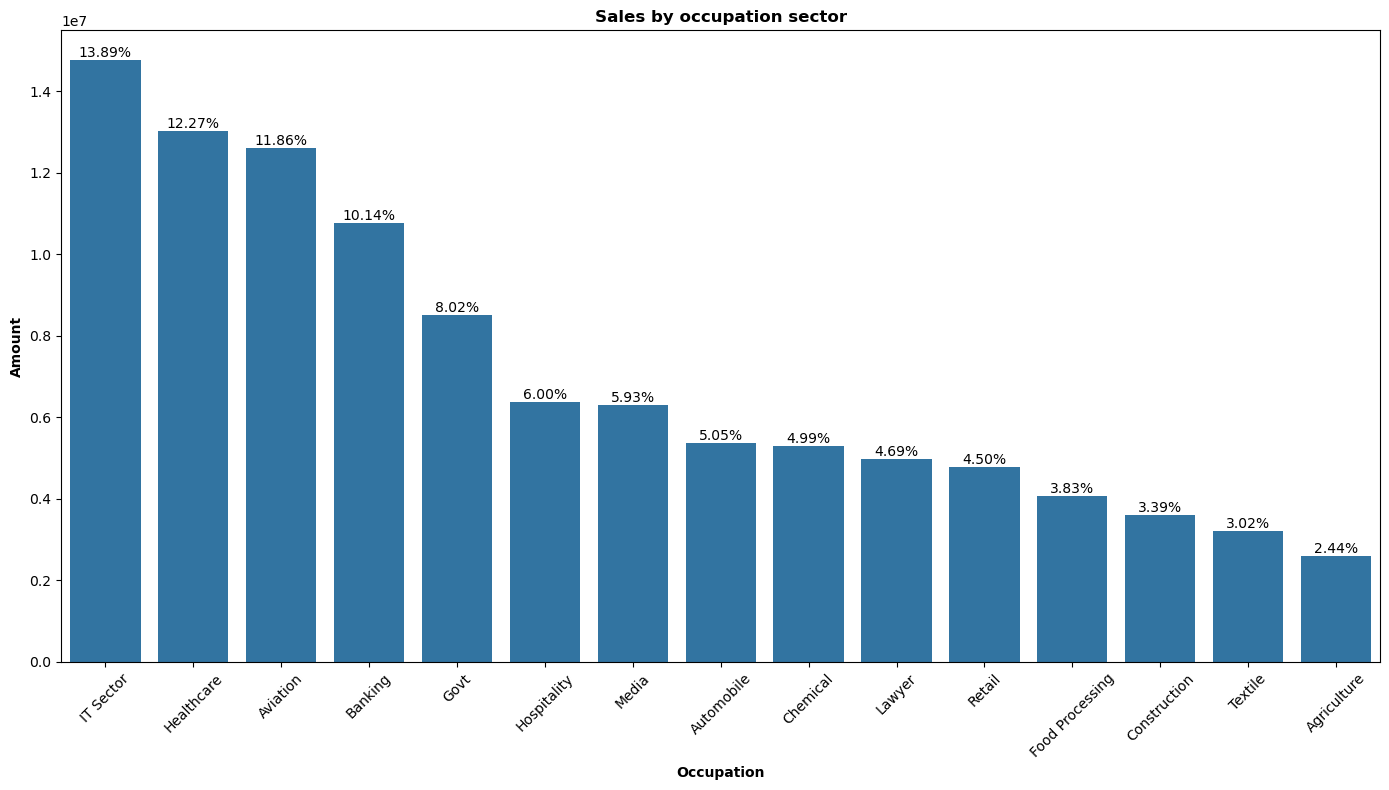

In [29]:
plt.figure(figsize=(14,8))
sns.barplot( data = sales_by_occupation , x= 'Occupation' , y = 'Amount'  )

total=sum(sales_by_occupation['Amount'])
for i, v in enumerate(sales_by_occupation["Amount"]):
    percentage = v/total *100
    plt.text(i, v, f'{percentage:.2f}%', ha="center", va="bottom")

plt.title('Sales by occupation sector' , fontweight='bold')
plt.xlabel('Occupation' , fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Amount' , fontweight='bold')
plt.tight_layout()

plt.show()

In [30]:
sales_by_product_category = df.groupby(['Product_Category'] , as_index= False )['Amount'].sum().sort_values(by='Amount' , ascending=False )

sales_by_product_category

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


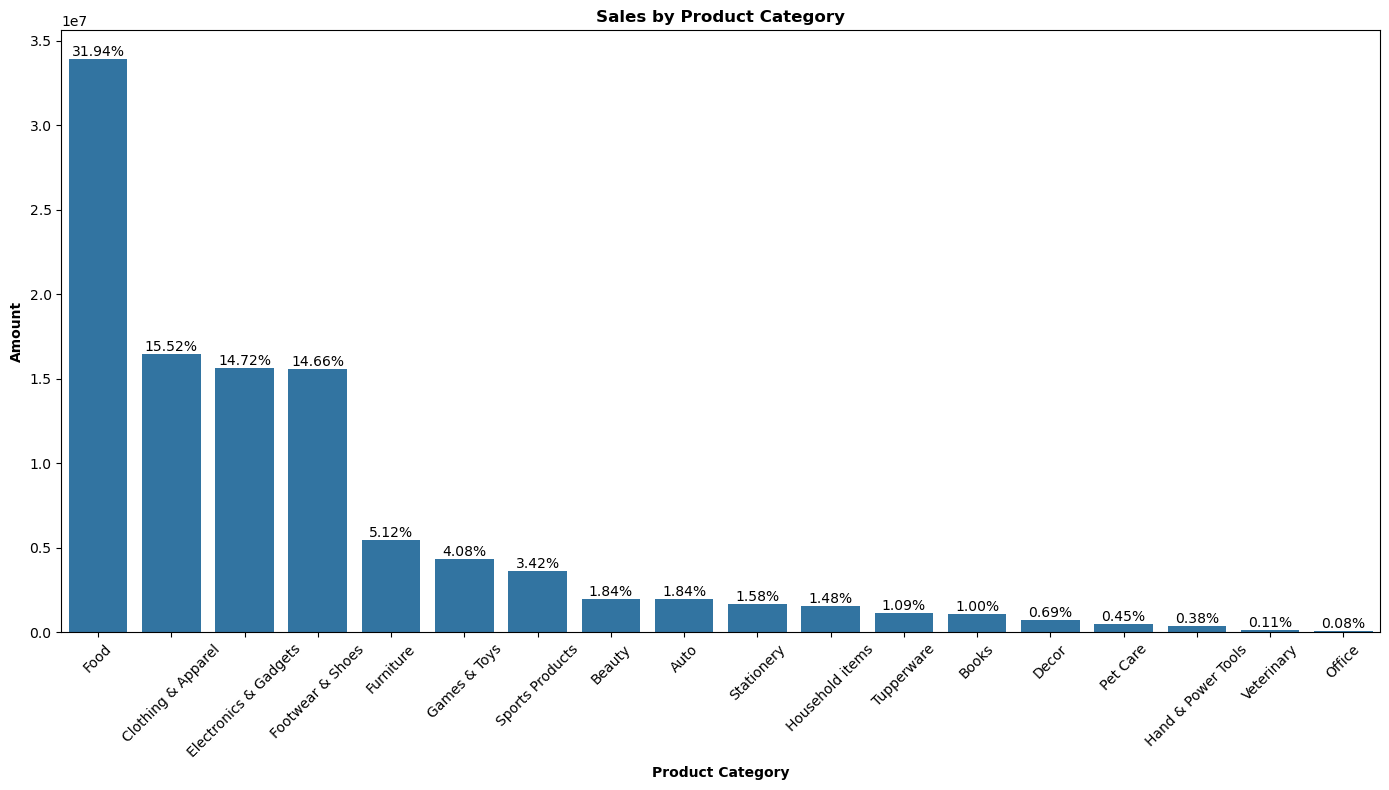

In [31]:
plt.figure(figsize=(14,8))
sns.barplot( data = sales_by_product_category , x= 'Product_Category' , y = 'Amount'  )

total=sum(sales_by_product_category['Amount'])
for i, v in enumerate(sales_by_product_category["Amount"]):
    percentage = v/total *100
    plt.text(i, v, f'{percentage:.2f}%', ha="center", va="bottom")

plt.title('Sales by Product Category' , fontweight='bold')
plt.xlabel('Product Category' , fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Amount' , fontweight='bold')
plt.tight_layout()

plt.show()

In [32]:
orders_by_product_category = df.groupby(['Product_Category'] , as_index= False )['Orders'].sum().sort_values(by='Orders' , ascending=False )

orders_by_product_category

,Product_Category,Orders
3,Clothing & Apparel,6634
6,Food,6110
5,Electronics & Gadgets,5226
7,Footwear & Shoes,2646
11,Household items,1331
1,Beauty,1086
9,Games & Toys,940
8,Furniture,889
14,Sports Products,870
13,Pet Care,536


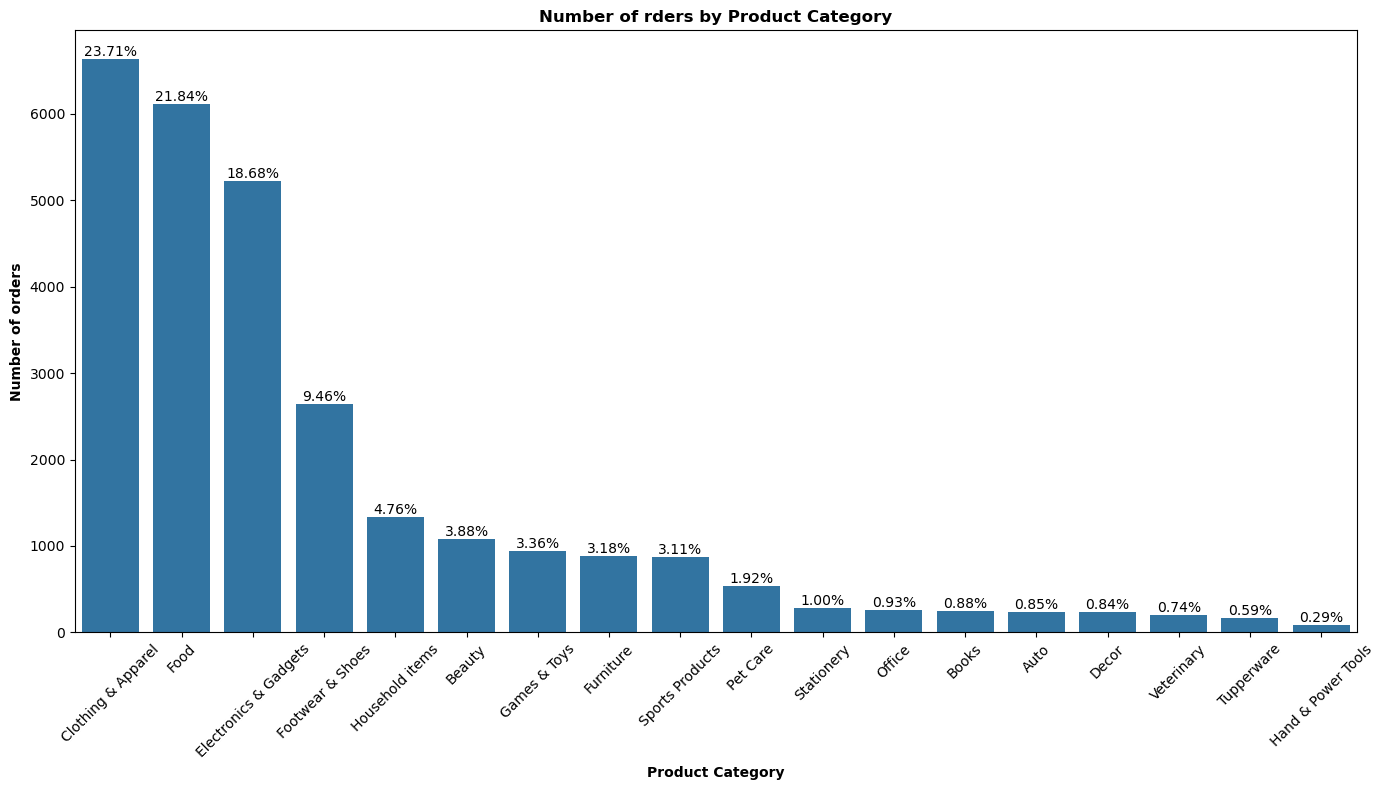

In [33]:
plt.figure(figsize=(14,8))
sns.barplot( data = orders_by_product_category , x= 'Product_Category' , y = 'Orders'  )

total=sum(orders_by_product_category['Orders'])
for i, v in enumerate(orders_by_product_category["Orders"]):
    percentage = v/total *100
    plt.text(i, v, f'{percentage:.2f}%', ha="center", va="bottom")
    
plt.title('Number of rders by Product Category' , fontweight='bold')
plt.xlabel('Product Category' , fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of orders' , fontweight='bold')
plt.tight_layout()

plt.show()